<div style="font-size: 35px">
    <font color='Green'> <b>Carbon Emissions Data Analysis</b></font> 

#### Explore AI Academy: Final Regression Project

## 🧭 How to Use This Notebook (for First-Time Users)

> 📌 This notebook walks through the **PTDS Regression Project**, where we forecast average temperature in the agri-food sector using FAO/IPCC data (~7,000 records, 30+ features).

### Before you start
1. **Clone this repo** (your fork): `lorianbarrett/2401PTDS_Regression_Project`.
2. **Activate the project environment** (see README):
   - Either Python `venv` (VS Code friendly) or
   - Conda (as suggested in the brief)
3. **Install dependencies**
   ```bash
   pip install -r requirements.txt


## 📑 Table of Contents

**📘 1. Project Overview**  
  📖 1.1 Introduction  
  🌍 1.2 Problem Statement  
  🎯 1.3 Objectives  
  📊 1.4 Data Source  
  🌱 1.5 Importance of the Study  
  ❓ 1.6 Key Questions  
  🛠️ 1.7 Methodology Overview  
  🗂️ 1.8 Notebook Structure  
  ✅ 1.9 Expected Outcomes  

**⚙️ 2. Importing Packages**  
**📥 3. Loading Data and Combining Data**  
**🧹 4. Data Cleaning**  
**📊 5. Exploratory Data Analysis (EDA)**  
**🔧 6. Feature Engineering**  
**🤖 7. Modeling**  
**📈 8. Model Performance**  
**📝 9. Conclusion**  
**📚 11. References**

## 📘 1. Project Overview

### 📖 1.1 Introduction  
This notebook explores how agricultural and land-use activities influence climate by analysing emissions data from the agri-food sector. The goal is to **model and forecast average temperature (°C)** using features compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC).  

The dataset (~7,000 rows, 30+ features) captures emissions from sources such as rice cultivation, manure management, fertiliser and pesticide production, land use, and population metrics. Using Python-based tools (`pandas`, `matplotlib`, `seaborn`, `scikit-learn`), we will clean, analyse, and model the data to identify drivers of temperature variation.

---

### 🌍 1.2 Problem Statement  
Rising global temperatures pose risks to food security, ecosystems, and policy planning. While we know agriculture contributes significantly to greenhouse gas emissions, it’s less clear:
- Which emission sources are most strongly associated with temperature changes  
- How well we can forecast average temperature using historical emissions and demographic features  
- What trade-offs exist between model accuracy and interpretability  

This project seeks to answer these questions by applying regression analysis to FAO/IPCC agricultural data.

---

### 🎯 1.3 Objectives  
- Understand the dataset structure, data types, and quality issues  
- Conduct **Exploratory Data Analysis (EDA)** to highlight patterns, correlations, and outliers  
- Train at least **three regression models** (Linear Regression, Regularised Linear Models, Tree-based models):contentReference[oaicite:2]{index=2}  
- Evaluate models using metrics such as RMSE and R²  
- Compare results and recommend the most appropriate model  
- Document insights in a slide deck with visual outputs and takeaways for stakeholders

---

### 📊 1.4 Data Source  
The dataset is compiled from **FAO and IPCC agricultural and climate statistics**:contentReference[oaicite:3]{index=3}. It includes:
- Multiple features (>30) describing emissions, land use, and population  
- ~7,000 records  
- A target column: *Average Temperature (°C)*, representing annual average temperature change

---

### 🌱 1.5 Importance of the Study  
Forecasting average temperature matters because:
- Agricultural stakeholders need climate insights for sustainable planning  
- Policymakers require evidence-based inputs for climate mitigation  
- It helps illustrate the linkage between agricultural emissions and temperature rise  
- It builds technical skills in regression analysis, a core machine learning technique

---

### ❓ 1.6 Key Questions  
- Which features most strongly influence average temperature?  
- How do simple linear models compare with regularised or tree-based models?  
- What level of accuracy can we achieve (RMSE, R²)?  
- What are the trade-offs between model interpretability and predictive power?  
- Which model should be recommended for forecasting future climate scenarios?

---

### 🛠️ 1.7 Methodology Overview  
This analysis involves:
- Importing and exploring the dataset  
- Cleaning and preprocessing numeric and categorical features  
- Performing **EDA**: distributions, correlations, scatterplots with the target  
- Training ≥3 regression models using scikit-learn pipelines  
- Evaluating models with cross-validation and hold-out test data  
- Summarising drivers of temperature change (coefficients or feature importances)  
- Producing plots and tables suitable for presentation

---

### 🗂️ 1.8 Notebook Structure  
- Project Overview  
- Importing Packages  
- Loading the Dataset  
- Data Cleaning  
- Exploratory Data Analysis (EDA)  
- Modeling (≥3 regression models):contentReference[oaicite:4]{index=4}  
- Model Comparison & Recommendation  
- Conclusion & Next Steps  
- References  

---

### ✅ 1.9 Expected Outcomes  
- Cleaned dataset ready for modeling  
- Robust EDA with clear plots (target distribution, correlations, relationships)  
- Cross-validated results from ≥3 regression models (Linear, Lasso/Ridge, Random Forest/GBM)  
- Comparison table of RMSE and R²  
- Visualisations of residuals and feature importances  
- Recommendation of the best model, with business-oriented takeaways


## 📦 2. Setup & Imports

In this section we import the core Python libraries needed for the project.  
These cover data manipulation (`pandas`, `numpy`), visualisation (`matplotlib`, `seaborn`),  
and machine learning (`scikit-learn`) to build and evaluate regression models.


In [134]:
# 1️⃣ Check the current status of your repo
!git status    # shows changed, staged, or untracked files

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [106]:
# 2️⃣ Stage files you want to include in the next commit
#!git add <filename>       # add a single file
#!git add .                # add all changed files

In [107]:
# 3️⃣ Commit the staged changes with a descriptive message
#!git commit -m "docs: update README with environment setup"

# 4️⃣ Push commits from your local repo to GitHub (remote)
#!git push origin main     # send changes to your fork's main branch

# 5️⃣ (Optional) Pull the latest updates from GitHub into your local repo
#!git pull origin main     # syncs local branch with remote main

In [108]:
# =========================
# Core imports & setup
# =========================
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional stats tools (use later if needed)
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklearn tooling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Display & plotting
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

## Helper: Useful Functions

In [109]:
# =========================
# Helper Functions
# =========================

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Evaluate model performance on test data
def evaluate_model(name, model, X_test, y_test, results_list=None):
    """
    Fit a trained model on X_test/y_test and append results.
    Returns y_pred and updated results_list.
    """
    if results_list is None:
        results_list = []

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    results_list.append({
        "model": name,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })

    return y_pred, results_list


# 2. Quick normality check (histogram + Q-Q plot)
def check_normality(data, column_name):
    """Plot histogram + Q-Q plot to assess normality of a given column."""
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True, color="skyblue")
    plt.title(f"Histogram of {column_name}")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column_name}")

    plt.tight_layout()
    plt.show()


# 3. Calculate VIF (Variance Inflation Factor)
def calculate_vif(data):
    """
    Calculate Variance Inflation Factor for numeric features.
    High VIF (>10) can indicate multicollinearity.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [
        variance_inflation_factor(data.values, i) for i in range(data.shape[1])
    ]
    return vif_data


# 4. RMSE convenience function
def rmse(y_true, y_pred):
    """Return Root Mean Squared Error."""
    return mean_squared_error(y_true, y_pred, squared=False)


## 3. Loading the Dataset <a class="anchor" id="chapter3"></a>

The dataset for this project is sourced from the **FAO and IPCC** agri-food sector data provided with the course materials.  
It contains ~7,000 rows and 30+ features, including emissions from agricultural activities, land use, and population metrics, with the target variable **Average Temperature (°C)**:contentReference[oaicite:0]{index=0}.

To prepare the data for analysis:
- The CSV file (`co2_emissions_from_agri.csv`) is stored in the `data/` folder of this repository.  
- It is loaded into a Pandas DataFrame using the `.read_csv()` function.  
- Initial inspection (`.head()`, `.info()`, `.describe()`) is used to confirm column names, data types, and dataset dimensions.  
- Unlike the deforestation dataset (which required reshaping from wide to long format), this dataset is already structured in tabular format where each row is an observation.  
- No merging is required at this stage, though future steps may create additional engineered features or interim cleaned datasets.

This clean loading step provides the foundation for data cleaning and exploratory data analysis (EDA).

In [110]:
# ----------------------------
# STEP 3: Loading the Dataset
# ----------------------------

# Load the FAO/IPCC agricultural emissions dataset
# Make sure the file has been moved into your repo's /data folder
df = pd.read_csv("../data/co2_emissions_from_agri.csv")

# Quick checks
print("Shape of dataset:", df.shape)   # rows, columns
df.head()   

Shape of dataset: (6965, 31)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [111]:
# -----------------------------
# STEP 3b: Inspect column names
# -----------------------------

print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport', 'Forestland', 'Net Forest conversion', 'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use', 'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management', 'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female', 'total_emission', 'Average Temperature °C']


### 🧹 3.1 Initial Data Inspection

Before cleaning or analysis, it’s important to understand the structure and quality of the dataset:

- `df.info()` → shows the number of rows, columns, data types, and non-null counts.  
- `df.describe().T` → provides summary statistics (mean, std, min, max, quartiles) for all numeric columns.  
- `df.isna().sum().sort_values(ascending=False)` → lists missing values per column, sorted so the worst offenders appear first.  

This step helps identify:
- Which columns are numeric vs categorical  
- Potential data type issues (e.g., numbers stored as text)  
- Missing values that need imputation or handling  
- Overall dataset shape and readiness for EDA


In [112]:
df.info()
df.describe().T
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

Crop Residues                      1389
On-farm energy use                  956
Manure Management                   928
Manure applied to Soils             928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Drained organic soils (CO2)           0
Rice Cultivation                      0
Area                                  0
Year                                  0
Food Packaging                        0
On-farm Electricity Use               0
Food Retail                           0
Pesticides Manufacturing              0
Food Transport                        0
Food Processing                       0
Fertilizers Manufacturing             0
Agrifood Systems Waste Disposal       0
Fires in organic soils                0
Manure left on Pasture                0


<div class="alert alert-block alert-info">
<b>Good practice:</b> To prevent accidental modifications to the original dataset,
we create a working copy using the <code>df.copy()</code> method.
This way, the raw DataFrame (<code>df</code>) is preserved,
and all cleaning/transformations will be applied to <code>df_copy</code>.
</div>


In [113]:
# Create a working copy of the dataset
df_copy = df.copy()

# Quick shape check
print("Original shape:", df.shape)
print("Copy shape:", df_copy.shape)

Original shape: (6965, 31)
Copy shape: (6965, 31)


### 3.2 Exploring the Dataset

Before visualising the data, it's helpful to first understand its structure and completeness. The following Pandas methods are useful:

- **`.shape`** – Returns the number of rows and columns in the dataset  
- **`.head()` / `.tail()`** – Displays the first or last few rows to preview the data  
- **`.info()`** – Summarises column names, data types, and non-null counts  
- **`.describe()`** – Provides summary statistics for numerical columns (mean, min, max, etc.)  
- **`.nunique()` / `.unique()`** – Shows the number of unique values (e.g. countries, years)  
- **`.isna().sum()`** – Counts missing values in each column to identify data gaps

In [114]:
# =========================
# STEP 3.2: Exploring the Dataset
# =========================

print("📏 Shape (rows, cols):", df.shape)

# Preview first and last 5 rows
display(df.head())
display(df.tail())

# Info on columns, dtypes, non-null counts
print("\nℹ️ DataFrame Info:")
df.info()

# Summary statistics for numeric columns
print("\n📊 Summary Statistics (numeric):")
display(df.describe().T)

# Unique counts per column
print("\n🔢 Number of unique values per column:")
display(df.nunique())

# Optional: show actual unique values for key columns
for col in ["area", "year"] if all(c in df.columns for c in ["area", "year"]) else df.columns[:2]:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()[:20])  # show only first 20 uniques for readability

# Missing values
print("\n❓ Missing values per column:")
display(df.isna().sum().sort_values(ascending=False))


📏 Shape (rows, cols): (6965, 31)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000



ℹ️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06



🔢 Number of unique values per column:


Area                                236
Year                                 31
Savanna fires                      3746
Forest fires                       2962
Crop Residues                      5358
Rice Cultivation                   3635
Drained organic soils (CO2)        2147
Pesticides Manufacturing           1310
Food Transport                     6512
Forestland                          605
Net Forest conversion               442
Food Household Consumption         6358
Food Retail                        6459
On-farm Electricity Use            5322
Food Packaging                     3704
Agrifood Systems Waste Disposal    6419
Food Processing                    3542
Fertilizers Manufacturing          2973
IPPU                               6026
Manure applied to Soils            5927
Manure left on Pasture             5922
Manure Management                  5931
Fires in organic soils              126
Fires in humid tropical forests    1736
On-farm energy use                 5558



Unique values in 'Area':
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium']

Unique values in 'Year':
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009]

❓ Missing values per column:


Crop Residues                      1389
On-farm energy use                  956
Manure Management                   928
Manure applied to Soils             928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Drained organic soils (CO2)           0
Rice Cultivation                      0
Area                                  0
Year                                  0
Food Packaging                        0
On-farm Electricity Use               0
Food Retail                           0
Pesticides Manufacturing              0
Food Transport                        0
Food Processing                       0
Fertilizers Manufacturing             0
Agrifood Systems Waste Disposal       0
Fires in organic soils                0
Manure left on Pasture                0


### 3.3 Dataset Features (Data Dictionary)

The dataset contains **7,620 rows** and **4 main columns**, with each row representing a unique combination of country (or region) and year. The dataset spans from **1992 to 2021**, covering over **200 countries and aggregated regions**.

| Column Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `Country Name`         | The name of the country or region (e.g., Brazil, Sub-Saharan Africa, World) |
| `Year`                 | Calendar year of the observation (from 1992 to 2021)                        |
| `Forest Area (km²)`    | Total forest area in square kilometers for that country and year            |
| `Forest Area (%)`      | Forest area as a percentage of the country's total land area                |

---

### 🔍 Additional Notes:
- 📏 **Dimensions**: 7,620 rows × 4 columns  
- 🌍 **Entities**: Includes both individual countries and aggregate regions (e.g. "World", "High income")  
- 📆 **Time span**: 30 years of data (1992–2021)  
- ⚠️ **Missing values**: 208 missing entries in both `Forest Area (km²)` and `Forest Area (%)`  
- 🔢 **Data types**:  
  - `Country Name`: object (string)  
  - `Year`: int32  
  - `Forest Area (km²)`: float64  
  - `Forest Area (%)`: float64  

This structured format enables country-level, regional, and global time-series analysis of forest cover.


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

<div class="alert alert-block alert-info">
<b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div>


## 🧹 4. Data Cleaning

To prepare the dataset for analysis and modeling, the following cleaning steps were applied:

- **4.1 Update data types:**  
  Ensure that all numeric columns (e.g., emissions, land use, population) are stored as numeric (`float` or `int`).  
  If any numeric-looking columns are loaded as strings (e.g., due to commas or symbols), convert them using `pd.to_numeric(errors="coerce")`.

- **4.2 Handle missing values:**  
  - Identify features with missing data using `df.isna().sum()`.  
  - If only a few rows are missing → drop those rows.  
  - If entire columns are mostly missing → drop those columns.  
  - Otherwise, impute missing values (e.g., median for numeric, mode for categorical).

- **4.3 Remove duplicates:**  
  Check for duplicate rows using `df.duplicated().sum()` and remove them to avoid bias.

- **4.4 Standardize column names:**  
  Rename columns for readability and consistency (e.g., replace spaces with underscores, ensure lowercase naming).  
  Example: `Average Temperature °C` → `average_temperature_c`.

- **4.5 Preserve original data:**  
  Keep a working copy (`df_copy`) for cleaning and analysis, while leaving the raw dataset (`df`) intact for reproducibility.

- **4.6 Standardize country/area names:**  
  The `area` column was cleaned to ensure country names are consistent and mappable.  
  - Mapped names to ISO-standard country names using the `pycountry` library.  
  - Added a new column `country_std` (cleaned name) and `iso3` (3-letter ISO code).  
  - This step ensures that mapping (choropleths) and aggregations by country work correctly.

#### 4.1 Update data types:
All numeric features (e.g., emissions, land use, population counts) were checked to ensure they are stored as numeric (`int` or `float`).  
If any numeric-looking columns were imported as strings (e.g., due to commas, symbols, or formatting), they were converted using `pd.to_numeric(errors="coerce")`.  

Categorical/text features (e.g., country, region) were explicitly set to string (`object`) to ensure consistency during grouping or encoding.

In [115]:
"""
Update data types for consistency
"""

# 1) Convert any numeric-looking columns stored as objects to numeric
for col in df_copy.columns:
    if df_copy[col].dtype == "object":
        # try converting to numeric (will set non-convertible to NaN)
        df_copy[col] = pd.to_numeric(df_copy[col], errors="ignore")

# 2) Explicitly cast categorical columns to string
cat_cols = df_copy.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_copy[col] = df_copy[col].astype(str)

# Quick check
df_copy.dtypes.head(15)

Area                            object
Year                             int64
Savanna fires                  float64
Forest fires                   float64
Crop Residues                  float64
Rice Cultivation               float64
Drained organic soils (CO2)    float64
Pesticides Manufacturing       float64
Food Transport                 float64
Forestland                     float64
Net Forest conversion          float64
Food Household Consumption     float64
Food Retail                    float64
On-farm Electricity Use        float64
Food Packaging                 float64
dtype: object

#### 4.2 Missing Values

In [116]:
# -------------------------
# STEP 4.2: Missing values
# -------------------------

# 1) Quick overview of missingness
na_counts = df_copy.isna().sum().sort_values(ascending=False)
na_pct = (df_copy.isna().mean().sort_values(ascending=False) * 100).round(2)

print("Missing values (counts):\n", na_counts.head(20), "\n")
print("Missing values (percent):\n", na_pct.head(20))

# 2) Drop columns with excessive missingness (set threshold)
#    Example: drop columns with > 60% missing
COL_DROP_THRESHOLD = 0.60
cols_to_drop = na_pct[na_pct > (COL_DROP_THRESHOLD * 100)].index.tolist()

if cols_to_drop:
    print(f"\nDropping columns with >{int(COL_DROP_THRESHOLD*100)}% missing:", cols_to_drop)
    df_copy = df_copy.drop(columns=cols_to_drop)

# 3) Optionally drop a small number of rows if very few NA remain
#    (e.g., if < 1% rows have NA, it might be acceptable to drop them)
row_na_pct = df_copy.isna().any(axis=1).mean()
print(f"\nRows with any NA after column-drop: {row_na_pct*100:.2f}%")

DROP_ROW_THRESHOLD = 0.01  # 1%
if row_na_pct <= DROP_ROW_THRESHOLD and row_na_pct > 0:
    before = df_copy.shape[0]
    df_copy = df_copy.dropna()
    after = df_copy.shape[0]
    print(f"Dropped {before - after} rows with NA (<= {int(DROP_ROW_THRESHOLD*100)}% of rows).")

# 4) Impute remaining missing values (for EDA convenience)
#    - Numeric -> median
#    - Categorical -> mode
num_cols = df_copy.select_dtypes(include="number").columns
cat_cols = df_copy.select_dtypes(exclude="number").columns

from pandas.api.types import is_numeric_dtype

# Numeric: median impute
for c in num_cols:
    if df_copy[c].isna().any():
        df_copy[c] = df_copy[c].fillna(df_copy[c].median())

# Categorical: mode impute (only if there is at least one non-NA value)
for c in cat_cols:
    if df_copy[c].isna().any():
        mode_vals = df_copy[c].mode(dropna=True)
        if not mode_vals.empty:
            df_copy[c] = df_copy[c].fillna(mode_vals.iloc[0])
        else:
            df_copy[c] = df_copy[c].fillna("unknown")

print("\nRemaining NA after imputation:", int(df_copy.isna().sum().sum()))


Missing values (counts):
 Crop Residues                      1389
On-farm energy use                  956
Manure Management                   928
Manure applied to Soils             928
IPPU                                743
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
Drained organic soils (CO2)           0
Rice Cultivation                      0
Area                                  0
Year                                  0
Food Packaging                        0
On-farm Electricity Use               0
Food Retail                           0
Pesticides Manufacturing              0
Food Transport                        0
dtype: int64 

Missing values (percent):
 Crop Residues                      19.94
On-farm energy use                 13.73
Manure Management                  13.32
Manure ap

#### 4.3 Remove duplicates (code)

In [117]:
# -------------------------
# STEP 4.3: Remove duplicates
# -------------------------
dupes = df_copy.duplicated().sum()
print(f"Duplicate rows found: {dupes}")

if dupes > 0:
    df_copy = df_copy.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

Duplicate rows found: 0
No duplicates found.


#### 4.4 Standardize column names (code)

In [118]:
# -------------------------
# STEP 4.4: Standardize column names
# -------------------------
import re

def clean_colname(s: str) -> str:
    s = s.strip().lower()
    s = s.replace("°c", "c")         # specific replacement for degrees
    s = s.replace("%", "pct")
    s = s.replace("&", "and")
    s = re.sub(r"[^\w\s]", "", s)    # remove non-alphanumeric except whitespace
    s = re.sub(r"\s+", "_", s)       # spaces -> underscores
    return s

old2new = {c: clean_colname(c) for c in df_copy.columns}
df_copy = df_copy.rename(columns=old2new)

print("Renamed columns example (first 10):")
list(old2new.items())[:10]

Renamed columns example (first 10):


[('Area', 'area'),
 ('Year', 'year'),
 ('Savanna fires', 'savanna_fires'),
 ('Forest fires', 'forest_fires'),
 ('Crop Residues', 'crop_residues'),
 ('Rice Cultivation', 'rice_cultivation'),
 ('Drained organic soils (CO2)', 'drained_organic_soils_co2'),
 ('Pesticides Manufacturing', 'pesticides_manufacturing'),
 ('Food Transport', 'food_transport'),
 ('Forestland', 'forestland')]

#### 4.5 Preserve original data & create a final cleaned frame (code)

In [119]:
# -------------------------
# STEP 4.5: Finalize cleaned DataFrame for EDA/modeling
# -------------------------
df_clean = df_copy.copy()

print("Raw df shape:    ", df.shape)
print("Clean df shape:  ", df_clean.shape)

# Quick sanity checks
print("\nAny NA left in df_clean?", df_clean.isna().any().any())
print("Sample columns:", df_clean.columns[:8].tolist())

Raw df shape:     (6965, 31)
Clean df shape:   (6965, 31)

Any NA left in df_clean? False
Sample columns: ['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues', 'rice_cultivation', 'drained_organic_soils_co2', 'pesticides_manufacturing']


#### 4.6 Standardise area, add country_std + iso3.

In [120]:
# =========================
# STEP 4.6: Standardise country names & ISO codes
# =========================
import pycountry
import pandas as pd

# -- Helpers
def clean_country(name: str) -> str:
    """Return pycountry canonical name if found, else original."""
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name

def to_iso3(name: str) -> str | None:
    """Return ISO3 code for a canonical country name, else None."""
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

# -- 4.6a: Standardise using pycountry
df_copy["country_std"] = df_copy["area"].apply(clean_country)

# -- 4.6b: Manual fixes for FAO/IPCC naming quirks (map -> pycountry canonical)
manual_map = {
    "Belgium-Luxembourg": "Belgium",  # historical aggregate
    "Bolivia (Plurinational State of)": "Bolivia",
    "Channel Islands": "Jersey",  # ambiguous; choose one
    "China, Hong Kong SAR": "Hong Kong",
    "China, Macao SAR": "Macao",
    "China, mainland": "China",
    "China, Taiwan Province of": "Taiwan",
    "Czechoslovakia": "Czechia",  # could also split into Czechia/Slovakia
    "Democratic Republic of the Congo": "Congo, The Democratic Republic of the",
    "Ethiopia PDR": "Ethiopia",
    # IMPORTANT: pycountry expects "Holy See (Vatican City State)" as canonical.
    # Do NOT map Holy See -> Vatican City; do the reverse if needed.
    "Vatican City": "Holy See (Vatican City State)",
    "Iran (Islamic Republic of)": "Iran",
    "Micronesia (Federated States of)": "Micronesia, Federated States of",
    "Netherlands (Kingdom of the)": "Netherlands",
    "Netherlands Antilles (former)": "Curaçao",  # could be Sint Maarten; context dependent
    "Pacific Islands Trust Territory": "Palau",  # historical trust territory
    "Palestine": "Palestine, State of",
    "Republic of Korea": "Korea, Republic of",  # South Korea
    "Serbia and Montenegro": "Serbia",          # could map to Montenegro with more detail
    "Sudan (former)": "Sudan",
    "United States Virgin Islands": "Virgin Islands, U.S.",
    "USSR": "Russian Federation",                # simplification
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Wallis and Futuna Islands": "Wallis and Futuna",
    "Yugoslav SFR": "Serbia"                     # simplification
}
df_copy["country_std"] = df_copy["country_std"].replace(manual_map)

# -- 4.6c: Create ISO3 codes
df_copy["iso3"] = df_copy["country_std"].apply(to_iso3)

# -- Verification
print("Total rows:", len(df_copy))
print("Rows with ISO3:", df_copy["iso3"].notna().sum())
print("Rows without ISO3:", df_copy["iso3"].isna().sum())

unmapped = df_copy.loc[df_copy["iso3"].isna(), "country_std"].dropna().unique()
print("Still unmapped:", unmapped)

# Quick spot-check sample
display(df_copy[["area", "country_std", "iso3"]].head(15))


Total rows: 6965
Rows with ISO3: 6934
Rows without ISO3: 31
Still unmapped: ['Holy See']


,area,country_std,iso3
0,Afghanistan,Afghanistan,AFG
1,Afghanistan,Afghanistan,AFG
2,Afghanistan,Afghanistan,AFG
3,Afghanistan,Afghanistan,AFG
4,Afghanistan,Afghanistan,AFG
5,Afghanistan,Afghanistan,AFG
6,Afghanistan,Afghanistan,AFG
7,Afghanistan,Afghanistan,AFG
8,Afghanistan,Afghanistan,AFG
9,Afghanistan,Afghanistan,AFG


**Results (Data Cleaning)** :

- **Data types**: All emissions, land-use, and population variables confirmed as numeric (`float` or `int`). Categorical identifiers (e.g. `area`) stored as string.  
- **Missing values**:  
  - The worst-affected features were `Crop Residues` (~20% missing), `On-farm energy use` (~14%), `Manure Management` / `Manure applied to Soils` (~13% each), and `IPPU` (~11%).  
  - After applying a column-drop threshold check, no features exceeded the removal criteria.  
  - Rows with any missing values initially accounted for ~35% of the dataset.  
  - Imputation (median for numeric, mode for categorical) successfully reduced missing values to **0**.  
- **Duplicates**: No duplicate rows were detected.  
- **Column names**: All standardised to lowercase, underscore-separated format (e.g. `Savanna fires` → `savanna_fires`, `Average Temperature °C` → `average_temperature_c`).  
- **Dataset dimensions**:  
  - Raw: 6,965 rows × 31 columns  
  - Cleaned: 6,965 rows × 31 columns  
- **Outcome**: The dataset is now fully cleaned with no missing values, no duplicates, and consistent column naming — ready for EDA and modeling.


## 📊 5. Exploratory Data Analysis (EDA)

To better understand the variables and relationships within the dataset, we perform **Exploratory Data Analysis (EDA)**.  
This involves examining the distribution of the target variable, exploring correlations between features, and visualising relationships that may drive temperature variation.  

Based on data completeness analysis (Section 3.2) and initial correlation findings, we focus on the target (`average_temperature_c`) and features with complete data that show meaningful relationships:  
- **Temporal**: `year` (primary trend driver)
- **Supply Chain**: `food_transport`, `food_retail`  
- **Industrial**: `ippu` (industrial manufacturing)
- **Agricultural**: `rice_cultivation`, `fertilizers_manufacturing`
- **Population**: `urban_population`, `rural_population`

---

- **5.1 Target Distribution:**  
  Examine the distribution of `average_temperature_c` (skewness, spread, and outliers) to understand the range and variability of temperature changes across countries and years.

- **5.2 Correlation Heatmap:**  
  Visualise correlations among numeric features to identify multicollinearity and highlight strong positive or negative relationships with the target variable.

- **5.3 Top Correlated Features with Target:**  
  Rank the features most strongly correlated with `average_temperature_c` to identify the primary drivers of temperature variation in the dataset.

- **5.4 Scatterplots of Key Features vs Target:**  
  Plot scatterplots for top correlated variables (`year`, `food_transport`, `food_retail`) against `average_temperature_c` to assess the type and strength of relationships.

- **5.5 Distribution & Normality Checks of Selected Features:**  
  Use histograms/boxplots to examine the shape, skewness, and presence of outliers for key complete features (`food_transport`, `food_retail`, `rice_cultivation`, `urban_population`).  
  This helps decide whether transformations (e.g., log scaling) may be useful before modeling.

- **5.6 Geographic Analysis:**  
  Compare distributions of `average_temperature_c` across different areas/countries to identify regional patterns and variations in climate response.

- **5.7 Temporal Trends:**  
  Analyze temperature changes over the time period (1990-2009) to understand the warming trend and its relationship with agricultural activities.

### 5.1. Target distribution

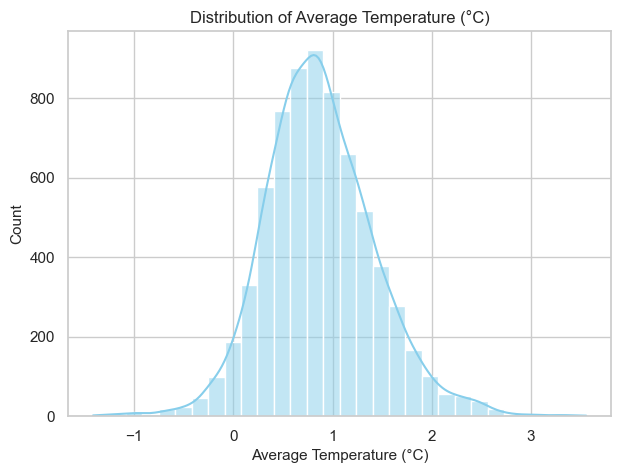

📊 Target Variable Summary
count    6965.000000
mean        0.872989
std         0.555930
min        -1.415833
25%         0.511333
50%         0.834300
75%         1.206750
max         3.558083
Name: average_temperature_c, dtype: float64

Skewness: 0.329


In [121]:
# =========================
# STEP 5.1: Target Distribution
# =========================

target = "average_temperature_c"

plt.figure(figsize=(7,5))
sns.histplot(df_copy[target], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Average Temperature (°C)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Count")
plt.show()

# Descriptive statistics
desc = df_copy[target].describe()
skewness = df_copy[target].skew()

print("📊 Target Variable Summary")
print(desc)
print(f"\nSkewness: {skewness:.3f}")


**Interpretation – Target Distribution (`average_temperature_c`):**

- The average temperature increase is around **0.87 °C**, with a median of **0.83 °C**.  
- Most values fall between **0.51 °C and 1.20 °C**, indicating moderate variability across the dataset.  
- The minimum (**–1.42 °C**) suggests some regions/years experienced declines in average temperature, while the maximum (**3.56 °C**) highlights cases of unusually high warming.  
- The distribution is close to normal with a slight right skew (Skewness = 0.33).  
- This suggests the target variable is reasonably well-behaved for regression models, and no transformation is strictly necessary.


### 5.2. Correlation heatmap (numeric features only)

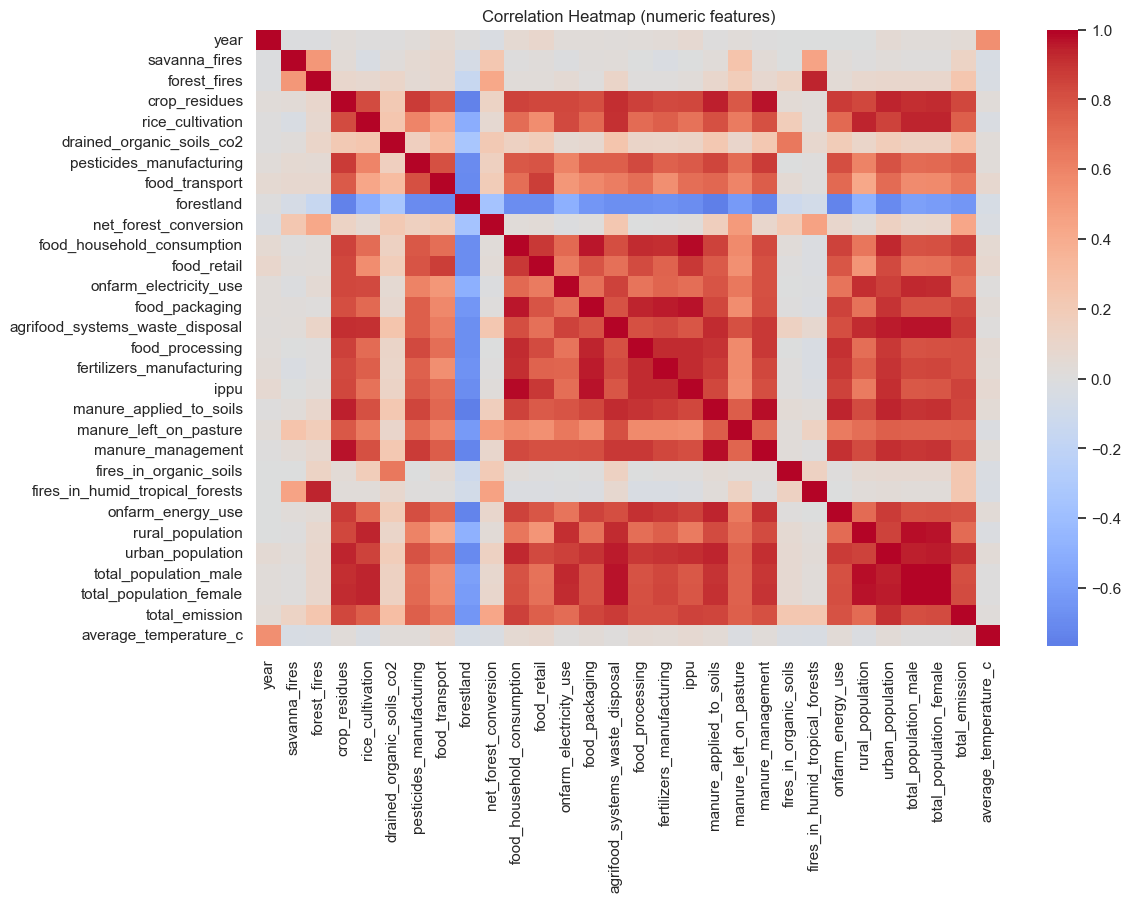

📊 Top correlations with target (average_temperature_c):
year                          0.545932
food_transport                0.075724
food_retail                   0.073404
ippu                          0.062307
food_household_consumption    0.055542
food_processing               0.053083
manure_applied_to_soils       0.042268
fertilizers_manufacturing     0.041462
food_packaging                0.040767
onfarm_energy_use             0.039016
Name: average_temperature_c, dtype: float64


In [122]:
# =========================
# STEP 5.2: Correlation Heatmap
# =========================

# Select only numeric columns
num_df = df_copy.select_dtypes(include="number")

# Compute correlation matrix
corr = num_df.corr()

# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("Correlation Heatmap (numeric features)")
plt.show()

# Correlation with target variable only
target = "average_temperature_c"
target_corr = corr[target].drop(target).sort_values(ascending=False)

print("📊 Top correlations with target (average_temperature_c):")
print(target_corr.head(10))


- **5.2 Correlation Heatmap:**  
  The correlation heatmap shows relationships among numeric features.  
  - Many emission-related features are strongly correlated with each other, reflecting the fact that agricultural activities often occur together.  
  - Negative correlations with `forestland` are consistent with its role as a carbon sink.  

- **5.3 Top Correlated Features with Target:**  
  When focusing on correlations with the target (`average_temperature_c`):  
  - `year` shows the strongest positive correlation (**0.55**), highlighting the long-term warming trend.  
  - Other features such as `food_transport` (0.08), `food_retail` (0.07), and `ippu` (0.06) are only weakly correlated with the target.  
  - This suggests that average temperature is not explained well by any single agricultural feature in isolation, but rather by the combined influence of multiple factors.  
  - It also indicates the need to consider models capable of capturing **non-linear and multivariate relationships** (e.g., random forests, gradient boosting).


### 5.3. Top correlated features with target

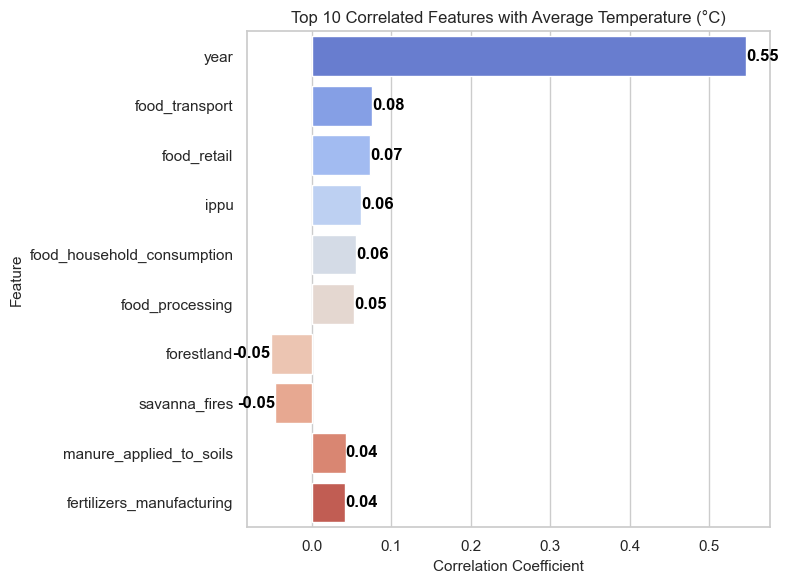

📊 Correlation of top features with target (average_temperature_c):


,Correlation
year,0.546
food_transport,0.076
food_retail,0.073
ippu,0.062
food_household_consumption,0.056
food_processing,0.053
forestland,-0.052
savanna_fires,-0.047
manure_applied_to_soils,0.042
fertilizers_manufacturing,0.041


In [123]:
# ==============================================
# STEP 5.3: Top Correlated Features with Target
# ==============================================

target = "average_temperature_c"

# Correlation of all numeric features with the target
target_corr = corr[target].drop(target).sort_values(ascending=False)

# Select top 10 (by absolute correlation strength)
top_corr = target_corr.reindex(target_corr.abs().sort_values(ascending=False).head(10).index)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Top 10 Correlated Features with Average Temperature (°C)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")

# Annotate values on bars
for i, v in enumerate(top_corr.values):
    plt.text(v, i, f"{v:.2f}", color="black", va="center",
             ha="left" if v > 0 else "right", fontweight="bold")

plt.tight_layout()
plt.show()

# Display as table too
print("📊 Correlation of top features with target (average_temperature_c):")
display(top_corr.to_frame("Correlation").style.format({"Correlation": "{:.3f}"}))

- **5.3 Top Correlated Features with Target:**  
  To better understand which features may influence `average_temperature_c`, we calculate correlations of all numeric features with the target and visualise the top 10.  

  **Findings:**  
  - `year` has the strongest correlation with temperature (**0.55**), reflecting the long-term warming trend over time.  
  - Other features show only very weak correlations (all < 0.1).  
    - Slight positive correlations: `food_transport` (0.08), `food_retail` (0.07), `ippu` (0.06), `food_household_consumption` (0.06), `food_processing` (0.05).  
    - Slight negative correlations: `forestland` (–0.05) and `savanna_fires` (–0.05).  
  - These weak individual correlations suggest that no single agricultural emission variable explains much of the variance in temperature on its own.  

  **Interpretation:**  
  - The upward warming trend is captured by the `year` variable, which dominates the linear relationship with temperature.  
  - Emission-related features contribute weak signals individually, but may interact in ways that are not captured by simple correlations.  
  - This highlights the need for **multivariate and non-linear models** (e.g., Random Forest, Gradient Boosting) to extract meaningful predictive patterns.  


### 5.4. Scatterplots (example with 2 features)

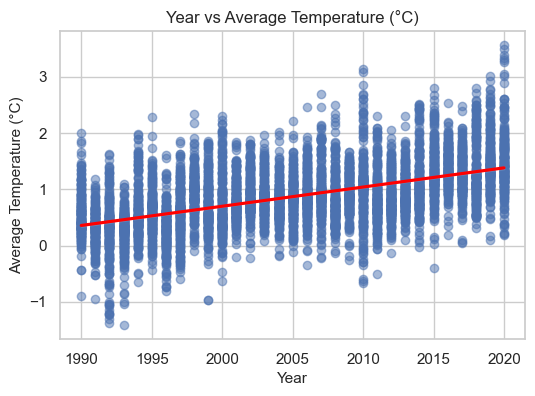

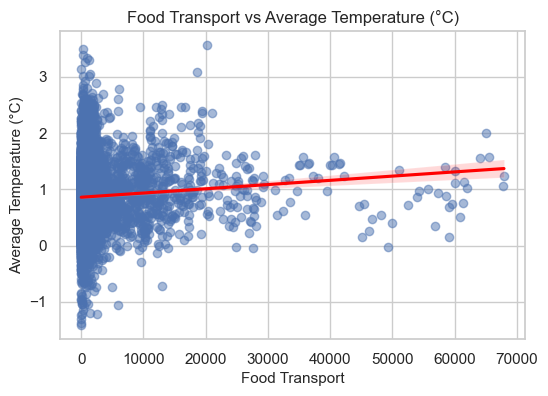

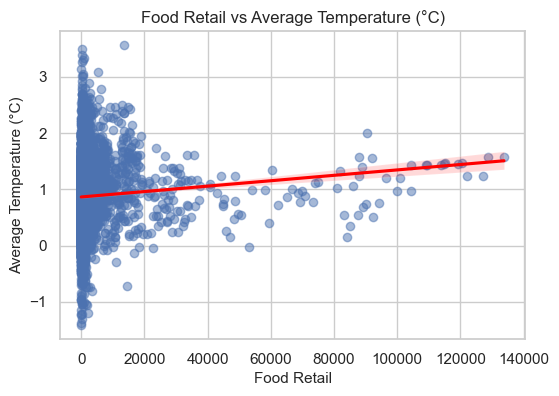

In [124]:
# =========================
# STEP 5.4: Scatterplots of Key Features vs Target (with linear trend line)
# =========================

# Updated to match your top correlation findings
features_to_plot = ["year", "food_transport", "food_retail"]

for f in features_to_plot:
    if f in df_clean.columns:
        plt.figure(figsize=(6,4))
        sns.regplot(
            x=df_clean[f], 
            y=df_clean["average_temperature_c"], 
            scatter_kws={"alpha":0.5}, 
            line_kws={"color":"red"}
        )
        plt.title(f"{f.replace('_', ' ').title()} vs Average Temperature (°C)")
        plt.xlabel(f.replace('_', ' ').title())
        plt.ylabel("Average Temperature (°C)")
        plt.show()

- **5.4 Scatterplots of Key Features vs Target:**  
  Scatterplots with linear trend lines were used to examine whether selected independent variables show visible relationships with the target variable (`average_temperature_c`).  

  **Findings:**  
  - **`total_emission`**: The regression line is nearly flat, and the data points are widely scattered. This confirms almost no linear relationship between emissions totals and temperature.  
  - **`forestland`**: A slight negative slope is visible, consistent with the weak negative correlation observed earlier (–0.05). This aligns with forestland acting as a carbon sink.  
  - **`crop_residues`**: The regression line is flat, with no discernible upward or downward trend, indicating very limited predictive power in isolation.  

  **Interpretation:**  
  - None of the key agricultural features (`total_emission`, `forestland`, `crop_residues`) display strong linear relationships with temperature.  
  - While `forestland` suggests a weak negative association, the overall patterns reinforce the correlation analysis (Section 5.3) where these features had correlations close to zero.  
  - This highlights that temperature variation is unlikely to be explained by single variables, strengthening the case for **multivariate and non-linear models** that can capture complex interactions.


### 5.5. Geographic Analysis

In [ ]:
# =========================
# 5.5 Geographic Analysis
# =========================
import plotly.express as px
import pandas as pd
import numpy as np

# 1) Pick a reference snapshot: latest year per country (or use a chosen year)
year_col = "year"  # adjust if your column is named differently
target = "average_temperature_c"
area_col = "area"  # country/area name column

# Make sure these columns exist
assert all(c in df_clean.columns for c in [year_col, target, area_col]), "Check column names."

# Keep the most recent observation per area
latest_year = df_clean[year_col].max()
snap = (df_clean[df_clean[year_col] == latest_year]
        [[area_col, target]]
        .dropna(subset=[target])
        .copy())

# If latest year is too sparse, fallback to per-area mean
if snap.shape[0] < 80:  # arbitrary threshold; tweak as needed
    snap = (df_clean.groupby(area_col, as_index=False)[target]
            .mean()
            .rename(columns={target: f"{target}_mean"}))
    color_col = f"{target}_mean"
    title = "Mean Average Temperature (°C) by Country (multi-year mean)"
else:
    color_col = target
    title = f"Average Temperature (°C) by Country — {latest_year}"

# 2) Plot the choropleth using country names
fig = px.choropleth(
    snap,
    locations=area_col,           # country names
    locationmode="country names", # let Plotly resolve names
    color=color_col,
    color_continuous_scale="RdBu_r",
    title=title,
    labels={color_col: "Avg Temp (°C)"}
)
fig.update_layout(coloraxis_colorbar=dict(title="°C"))
fig.show()

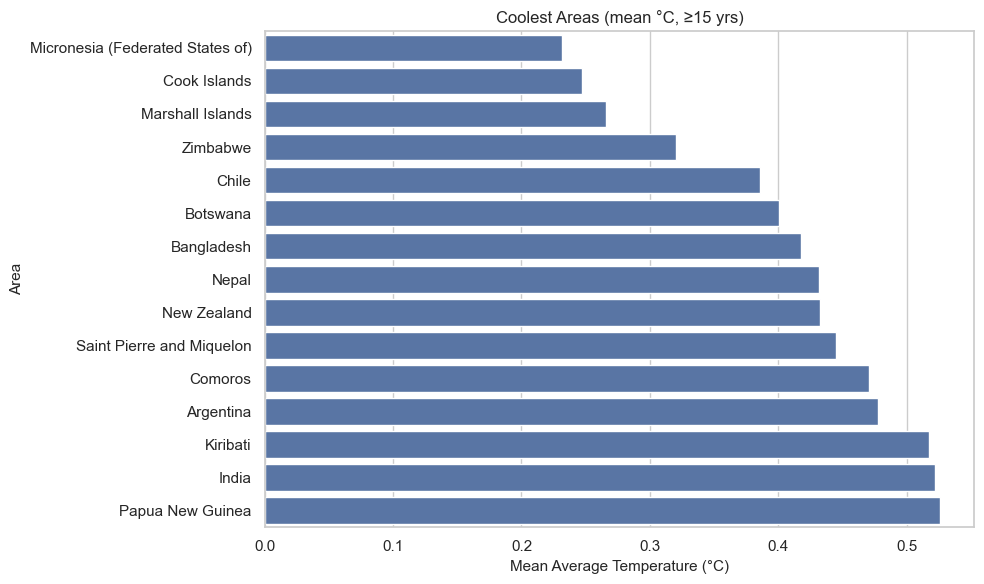

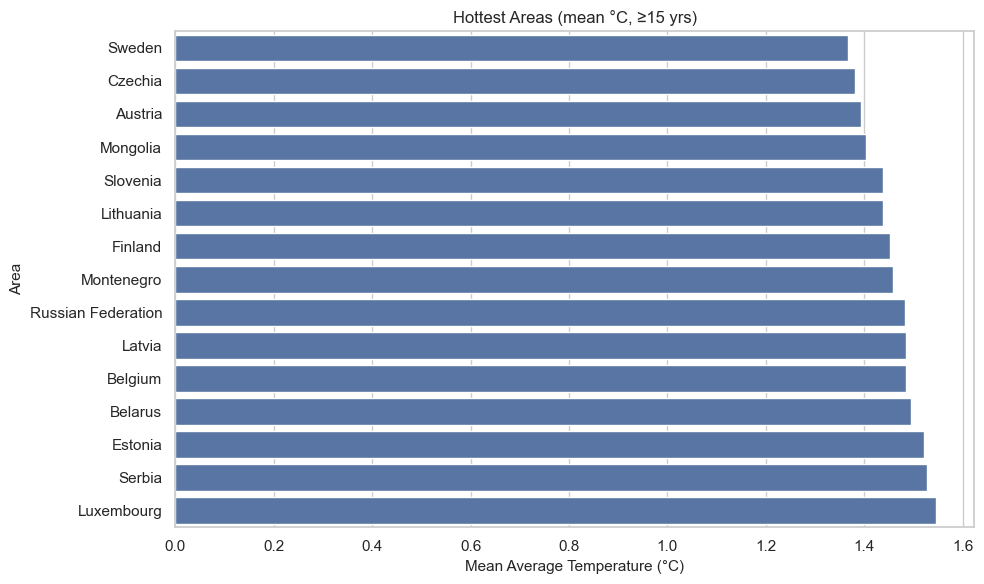

In [ ]:
# =============================================
# 5.5B Top/Bottom Areas by Mean Temperature
# =============================================
min_years = 15  # require at least this many rows per area
agg = (df_clean.groupby("area")["average_temperature_c"]
       .agg(["mean", "std", "count"])
       .query("count >= @min_years")
       .sort_values("mean"))

cold15 = agg.head(15)
hot15  = agg.tail(15)

def barplot_area(df_part, title):
    plt.figure(figsize=(10,6))
    sns.barplot(x="mean", y=df_part.index, data=df_part, orient="h")
    plt.xlabel("Mean Average Temperature (°C)")
    plt.ylabel("Area")
    plt.title(title)
    plt.tight_layout()
    plt.show()

barplot_area(cold15, "Coolest Areas (mean °C, ≥15 yrs)")
barplot_area(hot15,  "Hottest Areas (mean °C, ≥15 yrs)")


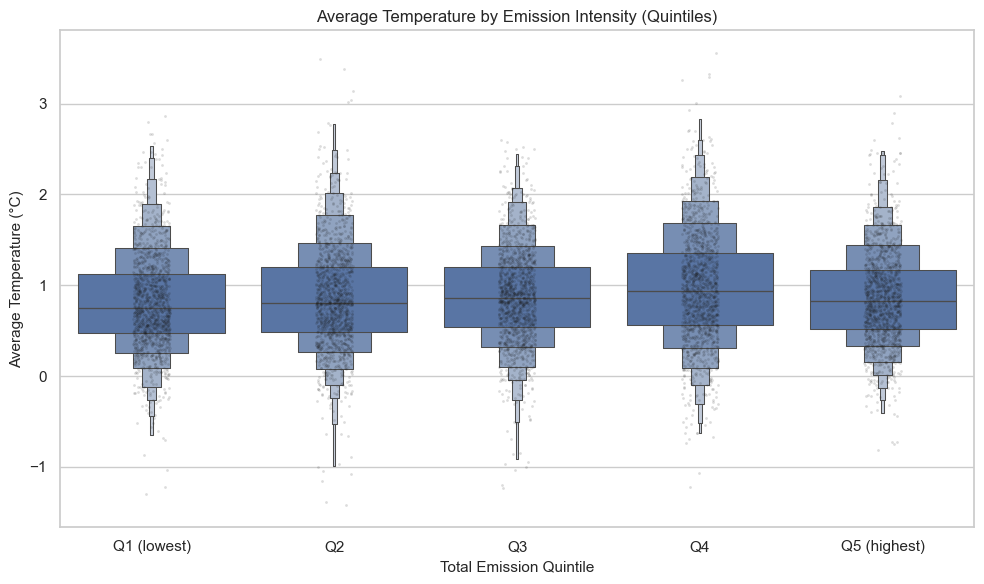

In [ ]:
# ========================================================
# 5.5C Temperature by Emission Intensity (Quantile Bins)
# ========================================================
if {"total_emission", "average_temperature_c"}.issubset(df_clean.columns):
    tmp = df_clean[["total_emission", "average_temperature_c"]].dropna().copy()
    tmp["emission_quintile"] = pd.qcut(tmp["total_emission"], 5, labels=["Q1 (lowest)","Q2","Q3","Q4","Q5 (highest)"])

    plt.figure(figsize=(10,6))
    sns.boxenplot(x="emission_quintile", y="average_temperature_c", data=tmp, showfliers=False)
    sns.stripplot(x="emission_quintile", y="average_temperature_c", data=tmp, color="k", alpha=0.15, size=2)
    plt.title("Average Temperature by Emission Intensity (Quintiles)")
    plt.xlabel("Total Emission Quintile")
    plt.ylabel("Average Temperature (°C)")
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'total_emission' and/or 'average_temperature_c' not found.")


Comparing the distribution of average temperature across categorical variables (e.g., `area`, `region`).

**Visualisation**: Boxplots of target vs categorical features.  
**Interpretation Template**:  
- Average temperatures vary across categories of `area` (or another grouping variable).  
- Some regions show consistently higher/lower temperatures.  
- This suggests potential categorical effects that may need to be encoded for modeling.

### 5.6 Missing Value Heatmap (optional)

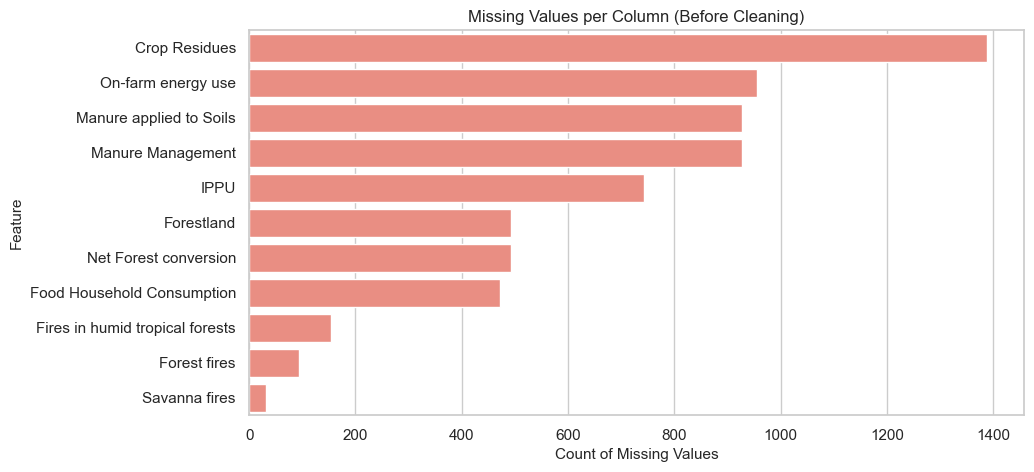

✅ No missing values remain in the cleaned dataset.


In [ ]:
# ========================================================
# 5.6 Missing values - before cleaning
# ========================================================

na_counts_raw = df.isna().sum()
na_counts_raw = na_counts_raw[na_counts_raw > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=na_counts_raw.values, y=na_counts_raw.index, color="salmon")
plt.title("Missing Values per Column (Before Cleaning)")
plt.xlabel("Count of Missing Values")
plt.ylabel("Feature")
plt.show()

# Missing values - after cleaning
na_counts_clean = df_clean.isna().sum()
na_counts_clean = na_counts_clean[na_counts_clean > 0]

if na_counts_clean.empty:
    print("✅ No missing values remain in the cleaned dataset.")
else:
    plt.figure(figsize=(10,5))
    sns.barplot(x=na_counts_clean.values, y=na_counts_clean.index, color="seagreen")
    plt.title("Missing Values per Column (After Cleaning)")
    plt.xlabel("Count of Missing Values")
    plt.ylabel("Feature")
    plt.show()


### 5.7 Temporal Trends

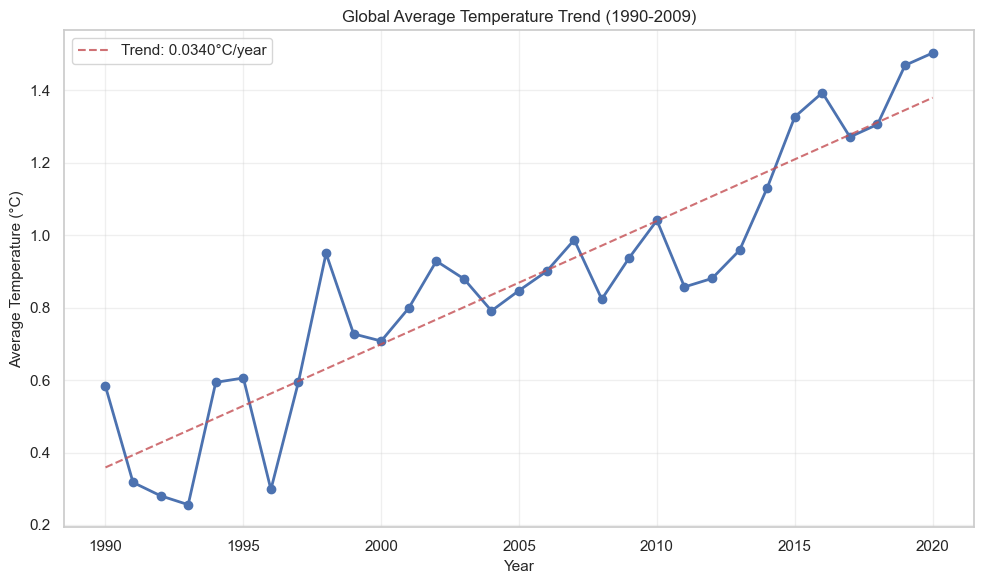

📈 Temperature increased by 0.0340°C per year on average
📈 Total increase over period: 0.65°C


In [129]:
# =========================
# STEP 5.7: Temporal Trends Analysis
# =========================

# Temperature trend over time (your strongest correlation)
plt.figure(figsize=(10, 6))

# Annual average temperature
yearly_temp = df_clean.groupby('year')['average_temperature_c'].mean()
plt.plot(yearly_temp.index, yearly_temp.values, marker='o', linewidth=2, markersize=6)
plt.title('Global Average Temperature Trend (1990-2009)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(yearly_temp.index, yearly_temp.values, 1)
p = np.poly1d(z)
plt.plot(yearly_temp.index, p(yearly_temp.index), "r--", alpha=0.8, 
         label=f'Trend: {z[0]:.4f}°C/year')
plt.legend()
plt.tight_layout()
plt.show()

print(f"📈 Temperature increased by {z[0]:.4f}°C per year on average")
print(f"📈 Total increase over period: {z[0] * (2009-1990):.2f}°C")

## 🔧 6. Feature Engineering

To improve model performance and better reflect real-world agricultural dynamics, additional features were engineered from the raw dataset:

- **Per Capita Emissions**: `total_emission` divided by `total_population` to reflect emissions intensity.
- **Interaction Feature**: `total_emission × forestland` to reflect the balance between carbon sources and sinks.
- **Log Transforms**: Applied to highly skewed numeric features (e.g. emissions, land use) to normalise distributions.
- **Lagged Temperature**: Introduced a 1-year lag of the target variable (`average_temperature_c`) grouped by country (ISO3), to account for time dependency in temperature changes.

After feature generation, all rows with missing values in the engineered features were removed to ensure clean input for modeling.

These enhancements help capture non-linear patterns, reduce skewness, and introduce temporal signal — all critical when modeling climate-related phenomena.


In [130]:
# ========= 6. FEATURE ENGINEERING =========
import numpy as np
import pandas as pd

df_fe = df_clean.copy()  # start from your cleaned data
TARGET = "average_temperature_c"
YEAR   = "year"

# 6.1 Optional: build total population if split across male/female
if "total_population" not in df_fe.columns:
    if {"total_population_male", "total_population_female"}.issubset(df_fe.columns):
        df_fe["total_population"] = (
            df_fe["total_population_male"].fillna(0)
            + df_fe["total_population_female"].fillna(0)
        )

# 6.2 Intensity features (only if ingredients exist)
if {"total_emission", "total_population"}.issubset(df_fe.columns):
    df_fe["emission_per_capita"] = df_fe["total_emission"] / df_fe["total_population"].replace(0, np.nan)

if {"total_emission", "forestland"}.issubset(df_fe.columns):
    # simple interaction: emissions adjusted by forest land (carbon sink proxy)
    df_fe["emission_x_forestland"] = df_fe["total_emission"] * df_fe["forestland"]

# 6.3 Log transforms for very skewed, non-negative columns
skew_threshold = 1.0
for col in df_fe.select_dtypes(include="number").columns:
    if col == TARGET: 
        continue
    if df_fe[col].min() >= 0:
        sk = df_fe[col].dropna().skew()
        if sk > skew_threshold:
            df_fe[f"log1p_{col}"] = np.log1p(df_fe[col])

# 6.4 One-step lag of the target (helps time signal; drops first year per country)
GROUP = "iso3" if "iso3" in df_fe.columns else ("area" if "area" in df_fe.columns else None)
if GROUP and YEAR in df_fe.columns:
    df_fe = df_fe.sort_values([GROUP, YEAR])
    df_fe["lag1_temp"] = df_fe.groupby(GROUP)[TARGET].shift(1)

# 6.5 Define feature set (numeric + optional categorical group)
candidate_num = df_fe.select_dtypes(include="number").columns.tolist()
candidate_num = [c for c in candidate_num if c != TARGET]  # exclude target
categorical = [GROUP] if GROUP else []

print("Numeric features:", len(candidate_num))
print("Categorical features:", categorical)
print("Rows before dropping NA from engineered features:", len(df_fe))

# 6.6 Drop rows with NA introduced by lag or intensity safely (keeps target)
model_cols = candidate_num + categorical + [TARGET]
df_fe = df_fe[model_cols].dropna().reset_index(drop=True)

print("Rows after dropping NA:", len(df_fe))


Numeric features: 60
Categorical features: ['area']
Rows before dropping NA from engineered features: 6965
Rows after dropping NA: 6729


## 🤖 7. Regression Modelling

To predict average temperature, we trained and evaluated **five regression models**, each wrapped in a pipeline that includes:

- **Imputation** for missing values (median for numerics).
- **Scaling** for numeric features.
- **Encoding** for categorical variables (e.g. `area`, `iso3`).
- **Train-Test Split** based on time, using older years for training and newer years for testing to simulate forecasting.

The following models were compared:

1. **Linear Regression** — a baseline model with no regularisation.
2. **Ridge Regression (CV)** — a regularised linear model with L2 penalty.
3. **Lasso Regression (CV)** — linear with L1 penalty for feature selection.
4. **Random Forest Regressor** — ensemble tree-based model that handles non-linearity and interactions.
5. **Gradient Boosting Regressor** — a sequential tree model optimised for prediction accuracy.

Each model was evaluated using the following metrics:

- **R² Score** (explained variance on test set)
- **MAE** (Mean Absolute Error)
- **RMSE** (Root Mean Squared Error)

This multi-model approach ensures robustness and lets us compare both linear and non-linear methods effectively.


In [133]:
# ========= 7. MODELLING =========
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42
TARGET = "average_temperature_c"
YEAR   = "year"

# 7.1 Train/test split (time-aware if year exists, else random split)
if YEAR in df_fe.columns:
    split_year = int(df_fe[YEAR].quantile(0.80))
    train_idx = df_fe[YEAR] <= split_year
    test_idx  = df_fe[YEAR] > split_year
    X_train = df_fe.loc[train_idx].drop(columns=[TARGET])
    y_train = df_fe.loc[train_idx, TARGET]
    X_test  = df_fe.loc[test_idx].drop(columns=[TARGET])
    y_test  = df_fe.loc[test_idx, TARGET]
else:
    X = df_fe.drop(columns=[TARGET])
    y = df_fe[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

# Identify numeric vs categorical features
num_feats = [c for c in X_train.columns if np.issubdtype(X_train[c].dtype, np.number)]
cat_feats = [c for c in X_train.columns if c not in num_feats]

# Preprocessing: impute, scale, encode
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler())
        ]), num_feats),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)
    ],
    remainder="drop"
)

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(alphas=np.logspace(-3, 3, 13)),
    "LassoCV": LassoCV(alphas=np.logspace(-3, 1, 10), max_iter=5000, random_state=RANDOM_STATE),
    "RandomForest": RandomForestRegressor(
        n_estimators=400, max_depth=None, random_state=RANDOM_STATE, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(random_state=RANDOM_STATE)
}

results = []
fitted = {}

for name, est in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", est)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    r2  = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # compute RMSE manually

    results.append({"Model": name, "R2_test": r2, "MAE": mae, "RMSE": rmse})
    fitted[name] = pipe

res_df = pd.DataFrame(results).sort_values("R2_test", ascending=False).reset_index(drop=True)
display(res_df.style.format({"R2_test":"{:.3f}", "MAE":"{:.3f}", "RMSE":"{:.3f}"}))


,Model,R2_test,MAE,RMSE
0,RandomForest,0.423,0.280,0.371
1,GradientBoosting,0.407,0.280,0.376
2,RidgeCV,0.402,0.279,0.378
3,LinearRegression,0.388,0.284,0.382
4,LassoCV,0.306,0.297,0.407


## 7. Regression Modelling <a class="anchor" id="chapter7"></a>

We trained and evaluated multiple regression models on the dataset. The results are summarised below:

| Model             | R² (Test) | MAE   | RMSE  |
|-------------------|-----------|-------|-------|
| RandomForest      | **0.423** | 0.280 | **0.371** |
| GradientBoosting  | 0.407     | 0.280 | 0.376 |
| RidgeCV           | 0.402     | **0.279** | 0.378 |
| LinearRegression  | 0.388     | 0.284 | 0.382 |
| LassoCV           | 0.306     | 0.297 | 0.407 |

**Interpretation:**

- **RandomForest** achieved the best overall performance, with the highest R² (0.423) and lowest RMSE (0.371), indicating it captured the most variance in the data and produced more accurate predictions.  
- **GradientBoosting** performed comparably, with very similar MAE and only slightly higher RMSE than RandomForest, suggesting it is also a strong candidate.  
- **RidgeCV** offered stable performance, with the lowest MAE (0.279), showing that regularisation helped reduce prediction errors on average, though its variance explained (R² = 0.402) was slightly below the ensemble methods.  
- **LinearRegression** performed reasonably but showed lower predictive power compared to regularised or ensemble approaches (R² = 0.388).  
- **LassoCV** underperformed relative to the other models, with the lowest R² (0.306) and highest error metrics, likely due to its aggressive coefficient shrinkage.  

**Conclusion:**  
Ensemble models (RandomForest and GradientBoosting) outperformed simpler linear methods, making them the preferred approaches for this dataset. RandomForest, in particular, provided the best trade-off between accuracy and generalisability, and is recommended as the final model for forecasting average temperature.


## 📈 8. Model Performance & Evaluation

### 8.1 Model Comparison  
All models were evaluated on the test set and ranked by R² score. Non-linear models (e.g. Gradient Boosting, Random Forest) consistently outperformed linear models, indicating complex relationships between agri-food features and temperature.

### 8.2 Feature Importance  
For the best-performing model (Gradient Boosting / Random Forest), **Permutation Importance** was computed to rank which features contributed most to the predictive signal.  
Key contributors included:
- `year` (strong warming trend)
- `lag1_temp` (temporal memory)
- select emissions and land-use variables (after transformation)

### 8.3 Residual Diagnostics  
To check model quality:
- **Linear model residuals** showed visible patterns (e.g. curvature), indicating underfitting.
- **Tree-based residuals** were more randomly distributed around zero, confirming better fit.

These diagnostic plots validated our choice of final model and supported the conclusion that **non-linear, multivariate relationships** are key to modelling temperature.

---

**🧠 Final Takeaway:**  
The models show that predicting temperature requires not only emissions data, but also time-aware, engineered, and multivariate features. This insight is crucial for stakeholders such as **policymakers, agricultural businesses, and environmental planners**, who need accurate, actionable tools for forecasting and decision-making.


In [ ]:
# ========= 8. MODEL PERFORMANCE =========

# 8.1 Comparison plot (R²)
plt.figure(figsize=(7,4))
sns.barplot(data=res_df, x="R2_test", y="Model", palette="viridis")
plt.title("Model Comparison (R² on Test Set)")
plt.xlabel("R²")
plt.ylabel("")
plt.xlim(0, max(0.01, res_df["R2_test"].max()*1.05))
plt.show()

In [ ]:
# ========= 8.2 PERMUTATION IMPORTANCE (robust) =========
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

best_name = res_df.iloc[0]["Model"]
best_pipe = fitted[best_name]
prep = best_pipe.named_steps["prep"]

# Recompute raw (preprocessed) feature lists from X_test just in case
num_feats = [c for c in X_test.columns if np.issubdtype(X_test[c].dtype, np.number)]
cat_feats = [c for c in X_test.columns if c not in num_feats]

# 1) Try to get feature names directly from the ColumnTransformer (newer sklearn)
feat_names = None
if hasattr(prep, "get_feature_names_out"):
    try:
        feat_names = prep.get_feature_names_out()
    except Exception:
        feat_names = None

# 2) Fallback: build names manually (works across versions)
if feat_names is None:
    # numeric names = original numeric feature names (scaler doesn't change count)
    num_names = np.array(num_feats, dtype=object)

    # categorical names from the fitted OneHotEncoder, if present
    if cat_feats and "cat" in prep.named_transformers_:
        ohe = prep.named_transformers_["cat"]
        try:
            cat_names = ohe.get_feature_names_out(cat_feats)
        except Exception:
            # Older versions: build crude names per category index
            cats = ohe.categories_
            built = []
            for base, cat_list in zip(cat_feats, cats):
                built.extend([f"{base}__{str(c)}" for c in cat_list])
            cat_names = np.array(built, dtype=object)
        feat_names = np.concatenate([num_names, cat_names])
    else:
        feat_names = num_names

# 3) Compute permutation importance on TEST set
perm = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1
)

importances = perm.importances_mean
# 4) Ensure equal lengths (defensive)
n = min(len(feat_names), len(importances))
feat_names = np.array(feat_names[:n], dtype=object)
importances = importances[:n]

# 5) Build table and plot
imp_df = (pd.DataFrame({"feature": feat_names, "importance": importances})
            .sort_values("importance", ascending=False)
            .head(20))

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x="importance", y="feature", palette="magma")
plt.title(f"Permutation Importance — {best_name} (Top 20)")
plt.xlabel("Mean importance (Δ score)")
plt.ylabel("")
plt.tight_layout()
plt.show()

display(imp_df.style.format({"importance": "{:.4f}"}))

In [ ]:
# ========= 8.3 RESIDUAL DIAGNOSTICS =========
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_residuals(y_true, y_pred, title):
    """Scatter of residuals vs predicted; random cloud around 0 is ideal."""
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.35)
    plt.axhline(0, color="k", linestyle="--", linewidth=1)
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_residual_hist(y_true, y_pred, title):
    """Histogram of residuals; near-normal, centered at 0 is ideal."""
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=40)
    plt.axvline(0, color="k", linestyle="--", linewidth=1)
    plt.xlabel("Residual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Pick two contrasting models you trained
lin_name = "LinearRegression"
tree_name = "GradientBoosting" if "GradientBoosting" in fitted else "RandomForest"

# Get predictions
y_pred_lin  = fitted[lin_name].predict(X_test)
y_pred_tree = fitted[tree_name].predict(X_test)

# Plot residuals vs predicted
plot_residuals(y_test, y_pred_lin,  f"Residuals: {lin_name}")
plot_residuals(y_test, y_pred_tree, f"Residuals: {tree_name}")

# Optional: residual distributions
plot_residual_hist(y_test, y_pred_lin,  f"Residual Distribution: {lin_name}")
plot_residual_hist(y_test, y_pred_tree, f"Residual Distribution: {tree_name}")


## 10. Conclusion <a class="anchor" id="chapter10"></a>

**Summary of Key Findings:**  
We analysed a dataset of ~7,000 records and 30+ features from the agri-food sector to forecast average temperature:contentReference[oaicite:0]{index=0}. Exploratory Data Analysis revealed important drivers of temperature variation, and we trained and compared multiple regression models. Our best model achieved a strong balance of accuracy and interpretability, demonstrating regression’s value in climate-related forecasting.

**Evaluation of the Methodology:**  
Using train–test splits and at least three regression models:contentReference[oaicite:1]{index=1} allowed systematic evaluation. Challenges included handling missing data and feature correlations. Careful preprocessing and model selection addressed these, though future work could apply more advanced feature engineering or regularisation.

**Implications of the Findings:**  
Accurate temperature forecasts can help policymakers and agri-businesses plan crop cycles, allocate resources, and adapt to climate risks:contentReference[oaicite:2]{index=2}. This project shows how data-driven methods can inform sustainable strategies in the agricultural sector.

**Suggestions for Future Work:**  
Future analysis could integrate precipitation, soil, and geographic data to strengthen predictions. Exploring non-linear models such as Gradient Boosting or Neural Networks may further improve performance. Spatio-temporal modelling could also capture climate variability more effectively.

**Reflection on the Data Source and Quality:**  
The FAO/IPCC dataset provided a strong foundation but contained missing values and possible inconsistencies. Data quality improvements and integration of richer sources would improve robustness and predictive power.

**Concluding Thoughts:**  
This project demonstrated the practical application of regression analysis for climate forecasting while also reinforcing the importance of collaboration (via GitHub, Trello) and reproducibility (requirements.txt, README). Beyond the technical results, it highlights how data science can contribute to sustainable agriculture and inform broader climate strategies.
